#1.Datasets


---



##1.1.Pre-processing Airline Dataset

In [ ]:
import pandas as pd

In [ ]:
# reading the data

df=pd.read_csv("/content/Tweets.csv")

# only keeping columns "tweet_id" "airline_sentiment" "text" from df

df = df[["tweet_id", "airline_sentiment", "text"]]

# airline_sentiment = positive put 1 if negative put -1 and neutral keep 0 in new column 'sentiment'

df['sentiment'] = df['airline_sentiment'].apply(lambda x: 1 if x == 'positive' else (0 if x == 'negative' else 2))
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
0    9178
2    3099
1    2363
Name: count, dtype: int64


In [ ]:

# Group the DataFrame by sentiment
grouped = df.groupby('sentiment')

# Select the first 2363 rows of each sentiment group
balanced_df = grouped.apply(lambda x: x.head(2363)).reset_index(drop=True)

# Shuffle the DataFrame
shuffled_df = balanced_df.sample(frac=1).reset_index(drop=True)


In [ ]:
import re
# remove '@" and the word after it so the usernames will be removed

shuffled_df['text'] = shuffled_df['text'].apply(lambda x: re.sub(r'@\w+', '', x))

new_df = shuffled_df[['text', 'sentiment']]


In [ ]:
# remove links from the text

new_df['text'] = new_df['text'].apply(lambda x: re.sub(r'http\S+', '', x))




<ipython-input-5-66026fbe0382>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['text'] = new_df['text'].apply(lambda x: re.sub(r'http\S+', '', x))


In [ ]:
df_majority = new_df[new_df['sentiment'] == 0]
df_minority = new_df[new_df['sentiment'] == 1]

# Downsample the majority class to match the number of samples in the minority class
df_majority_downsampled = df_majority.sample(n=len(df_minority), random_state=42)  # You can change random_state for different sampling

# Concatenate the downsampled majority class with the minority class
balanced_df = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the balanced DataFrame
balanced_df = balanced_df.sample(frac=1).reset_index(drop=True)

# Print the balanced DataFrame
print(balanced_df)


                                                   text  sentiment
0        ... I love you. Air travel doesn't get easier.          1
1      Thx for the GRAND view today! FLT 3825 SEATAC...          1
2      Fabulous - thank you so much! Looking forward...          1
3        I'm not sure why I expected anyone to be here           0
4               I need #United to be a better airline!!          0
...                                                 ...        ...
4721   really? 3 hr delay, 4 gate changes, &amp; you...          0
4722  , if you mean beyond opaque "maintenance issue...          0
4723   I had planned to book additional flights toni...          0
4724   I was happy to purchase the upgrade. If only ...          1
4725                       you are one great airline ❤️          1

[4726 rows x 2 columns]


In [ ]:
balanced_df.to_csv('shuffled_cleaned_airline_data.csv', index=False)

##1.2. Pre-processing T4SA






In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

# Specify the file path
tsv_file_path = '/content/drive/MyDrive/t4sa text sentiment and raw tweets/t4sa_text_sentiment.tsv'

# Read the TSV file into a DataFrame
df_tsv = pd.read_csv(tsv_file_path, sep='\t')

# Display the DataFrame
#print(df_tsv[:5])
# Specify the file path
csv_file_path = '/content/drive/MyDrive/t4sa text sentiment and raw tweets/raw_tweets_text.csv'

# Read the CSV file into a DataFrame
df_csv = pd.read_csv(csv_file_path)

# Display the DataFrame
#print(df_csv[:5])
merged_df = pd.merge(df_csv, df_tsv, left_on='id', right_on='TWID')

# Display the merged DataFrame
print(merged_df[:5])

                   id                                               text  \
0  768097627686604801  Josh Jenkins is looking forward to TAB Breeder...   
1  768097631864102912  RT @2pmthailfans: [Pic] Nichkhun from krjeong8...   
2  768097640278089729  RT @MianUsmanJaved: Congratulations Pakistan o...   
3  768097627695042560  RT @PEPalerts: This September, @YESmag is taki...   
4  768096868504969216  #Incredible #India #Atulya #Bharat - Land of S...   

                 TWID       NEG       NEU       POS  
0  768097627686604801  0.008090  0.042331  0.949579  
1  768097631864102912  0.014644  0.926557  0.058800  
2  768097640278089729  0.004939  0.029469  0.965591  
3  768097627695042560  0.006389  0.018663  0.974948  
4  768096868504969216  0.049398  0.861395  0.089207  


In [ ]:
output_csv_path = '/content/CSV/merged_data.csv'

# Save the merged DataFrame as a CSV file
merged_df.to_csv(output_csv_path, index=False)


In [ ]:

import pandas as pd


# Check if 'id' is equal to 'TWID' and create a new DataFrame with the rows that satisfy the condition
filtered_df = merged_df[merged_df['id'] == merged_df['TWID']]

# Create a new DataFrame without the 'TWID' column
result_df = filtered_df.drop(columns=['TWID'])

# Save the result to a new CSV file
result_df.to_csv('result.csv', index=False)

# Determine the maximum value between 'NEG', 'NEU', and 'POS' for each row
result_df['Max'] = result_df[['NEG', 'NEU', 'POS']].idxmax(axis=1)

# Map the 'Max' column based on the conditions you specified
result_df['Max'] = result_df['Max'].map({'NEG': 0, 'NEU': 1, 'POS': 1})

# Drop 'NEG', 'NEU', and 'POS' columns
result_df = result_df.drop(columns=['NEG', 'NEU', 'POS'])

# Save the result to a new CSV file
result_df.to_csv('t4sa - clean data.csv', index=False)

In [ ]:
# Shuffle the rows of the DataFrame
result_df_shuffle = result_df.sample(frac=1).reset_index(drop=True)

# Save the shuffled result to a new CSV file
result_df_shuffle.head(20)

,id,text,Max
0,796328019916914688,I will always love you and remember about you ...,1
1,769164289542352896,It's not Thug's fault it's his predecessors' s...,0
2,782045697545740289,Chris stauffer playing with his new toy https:...,1
3,796794439092076546,pure talent and inspiration. Happy Birthday. #...,1
4,769221663393185792,RT @gucciglostance: who did this ???????????? ...,1
5,769006583695015936,RT @QuenandHope: These kids are my sunshine. M...,1
6,768717067679924225,RT @ExeterChiefs: . @ExeterChiefs and @Nuffiel...,1
7,798874176325087232,Genesis J @iamgenesisj - WHATSAPP https://t.co...,1
8,797937114293800960,"White didn't expect Miesha Tate's retirement, ...",0
9,800802968962416641,"Want to work in #STUART, FL? View our latest o...",1


In [ ]:
#Text preprocessing
import re
# dataset_name = 't4sa.csv'
# cols = ['id','text','Max']
# path='/content/drive/MyDrive/t4sa/'
# df = pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')
dataset_name = 't4sa - clean data.csv'
cols = ['id','text','Max']
path='/content/'
df=pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')
import re

df['text'] = df['text'].apply(lambda tweet: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t.,])|(\w+:\/\/\S+)", " ", tweet).split()))

df.drop(df.head(1).index, inplace=True)
df.Max = df.Max.astype(int)


<ipython-input-31-8f01a8c6365e>:10: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')


In [ ]:
#Balancing data

# Selecting 5000 rows with Max=1
max_1_rows = df[df['Max'] == 1].head(20000)

# Selecting 5000 rows with Max=0
max_0_rows = df[df['Max'] == 0].head(20000)

# Concatenating the selected rows
df = pd.concat([max_1_rows, max_0_rows])



In [ ]:
import pandas as pd

# Assuming your DataFrame is named df and the column containing labels is named 'label'
label_counts = df['Max'].value_counts()

# Number of rows with label 0
num_label_0 = label_counts.get(0, 0)

# Number of rows with label 1
num_label_1 = label_counts.get(1, 0)

print("Number of rows with label 0:", num_label_0)
print("Number of rows with label 1:", num_label_1)

Number of rows with label 0: 179050
Number of rows with label 1: 179050


In [ ]:
import pandas as pd

# # Assuming your DataFrame is named df
# # Selecting the last 5000 rows
# last_5000_rows = df.tail(5000)

# # Selecting the first 5000 rows
# first_5000_rows = df.head(5000)

# # Concatenating the first and last 5000 rows
# df = pd.concat([first_5000_rows, last_5000_rows])

# # Resetting the index of the new DataFrame
# df.reset_index(drop=True, inplace=True)

# Now se
#df = df.sample(frac=1).reset_index(drop=True)
print(df.head(20))
#for gettin it faster
#df=df.head(10000)
x = df.text
y = df.Max
y = y.astype(int)

                    id                                               text  Max
1   768097627686604801  Josh Jenkins is looking forward to TAB Breeder...    1
2   768097631864102912                RT Pic Nichkhun from krjeong86 s IG    1
3   768097640278089729  RT Congratulations Pakistan on becoming No1Tes...    1
4   768097627695042560  RT This September, is taking you to Maine Mend...    1
5   768096868504969216  Incredible India Atulya Bharat Land of Seekers...    1
6   768097661237026816  RT gaibis Newly painted walls, thanks a millio...    1
7   768097665418747908  RT Excited to announce as of July 2017 Feschot...    1
8   768097636087980032              RT Who is excited for illuminate ....    1
9   768097619281227776  RT The firstdayofschool for students amp teach...    1
10  768097631872618497  RT This kid is 11 and in my organic chemistry ...    1
11  768097619285536768       RT Kate wrights figure is all I want in life    1
12  768097644463788032  RT TX Women owned business i

In [ ]:
df.to_csv('t4-clean-40000.csv', index=False)

In [ ]:
import re

def remove_rt(text):
    match = re.match(r'^RT(.*)', text)
    if match:
        return match.group(1).strip()
    else:
        return text

# Applying the function to the rows where the text starts with "RT"
df.loc[df['text'].str.startswith('RT'), 'text'] = df[df['text'].str.startswith('RT')]['text'].apply(remove_rt)
# Drop rows where 'text' is empty
df = df.dropna(subset=['text'])
print(df)

                         id  \
1        768097627686604801   
2        768097631864102912   
3        768097640278089729   
4        768097627695042560   
5        768096868504969216   
...                     ...   
1179925  804614261741715456   
1179932  804615159289257984   
1179933  804615218039058432   
1179948  804617365522501632   
1179951  804617596205142016   

                                                      text  Max  
1        Josh Jenkins is looking forward to TAB Breeder...    1  
2                         Pic Nichkhun from krjeong86 s IG    1  
3        Congratulations Pakistan on becoming No1TestTe...    1  
4        This September, is taking you to Maine Mendoza...    1  
5        Incredible India Atulya Bharat Land of Seekers...    1  
...                                                    ...  ...  
1179925  Snapchat dying to see this close and personal ...    0  
1179932  FREE tongue piercing. Vibrates while she sucks...    0  
1179933  The Oak Leaf path.Those 

In [ ]:
shuffled_df = df.sample(frac=1).reset_index(drop=True)

# Save the shuffled DataFrame to a CSV file
shuffled_df.to_csv('shuffled_cleaned_tweet_40K_data.csv', index=False)

print("DataFrame shuffled and saved as shuffled_data-Notempty.csv")

DataFrame shuffled and saved as shuffled_data-Notempty.csv


In [ ]:
dataset_name = 'shuffled_cleaned_tweet_40K_data.csv'
cols = ['id','text','Max']
path='/content/'
df=pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')

<ipython-input-41-81a558497335>:4: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path + dataset_name, header = None, names = cols, encoding = 'latin-1')


In [ ]:
missing_values = df.isnull().sum()

# Print columns with missing values
print("Columns with missing values:")
print(missing_values[missing_values > 0])

Columns with missing values:
text    2
dtype: int64


In [ ]:
df = df.dropna()


In [ ]:
df.to_csv('shuffled_cleaned_tweet_40K_data0.csv', index=False)

#2.Training Model


---



##1.2.Training Model - Airline Dataset

In [ ]:
!pip install tensorflow==2.15.1


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 475.2/475.2 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.0/442.0 kB 15.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: wrapt
    Found existing installation: wrapt 1.16.0
    Uninstalling wrapt-1.16.0:
      Successfully uninstalled wrapt-1.16.0
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.0
    Uninstalling ml-dtypes-0.4.0:
      Successfully uninstalled ml-dtypes-0.4.0
  Attempting uninstall: keras
    Found existing installation: keras 3.4.1
    Uninstalling keras-3.4.1:
      Successfully uninstalled keras-3.4.1
  Attempting uninstall: tensorboard
    Found existing installation

In [ ]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 kB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 28.4 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.44.2
    Uninstalling transformers-4.44.2:
      Successfully uninstalled transformers-4.44.2


In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.callbacks import ModelCheckpoint
from transformers import BertTokenizer


In [ ]:

data=pd.read_csv('/content/shuffled_cleaned_airline_data.csv')

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define max sequence length
max_len = 100

# Tokenize the text data
def tokenize_function(text, max_len):
    return tokenizer(
        text,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

# Apply tokenization
tokenized_data = data['text'].apply(lambda x: tokenize_function(x, max_len))

# Extract input_ids, token_type_ids, and attention_mask
input_ids = tf.concat([x['input_ids'] for x in tokenized_data], axis=0)
token_type_ids = tf.concat([x['token_type_ids'] for x in tokenized_data], axis=0)
attention_mask = tf.concat([x['attention_mask'] for x in tokenized_data], axis=0)

# Convert labels to tensor
labels = tf.constant(data['sentiment'].values, dtype=tf.float32)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

In [ ]:
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dropout, Dense, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, SpatialDropout1D, Bidirectional, LSTM, GRU, concatenate, Lambda, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

def dot_product(x, kernel):
    if tf.keras.backend.backend() == 'tensorflow':
        return tf.squeeze(tf.matmul(x, tf.expand_dims(kernel, axis=-1)), axis=-1)
    else:
        return tf.matmul(x, kernel)


In [ ]:
class AttentionWithContext(tf.keras.layers.Layer):
    def __init__(self, W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None, bias=True, **kwargs):
        self.init = tf.keras.initializers.get('glorot_uniform')
        self.W_regularizer = tf.keras.regularizers.get(W_regularizer)
        self.u_regularizer = tf.keras.regularizers.get(u_regularizer)
        self.b_regularizer = tf.keras.regularizers.get(b_regularizer)
        self.W_constraint = tf.keras.constraints.get(W_constraint)
        self.u_constraint = tf.keras.constraints.get(u_constraint)
        self.b_constraint = tf.keras.constraints.get(b_constraint)
        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer=self.init,
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint,
                                 name='{}_W'.format(self.name))
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint,
                                     name='{}_b'.format(self.name))
        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint,
                                 name='{}_u'.format(self.name))
        super(AttentionWithContext, self).build(input_shape)

    def call(self, x, mask=None):
        uit = tf.keras.backend.dot(x, self.W)
        if self.bias:
            uit += self.b
        uit = tf.keras.activations.tanh(uit)
        ait = tf.keras.backend.dot(uit, tf.expand_dims(self.u, axis=-1))
        ait = tf.squeeze(ait, axis=-1)
        a = tf.keras.backend.exp(ait)
        if mask is not None:
            a *= tf.keras.backend.cast(mask, tf.float32)
        a /= tf.keras.backend.cast(tf.keras.backend.sum(a, axis=1, keepdims=True) + tf.keras.backend.epsilon(), tf.float32)
        a = tf.expand_dims(a, axis=-1)
        weighted_input = x * a
        return tf.keras.backend.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]


In [ ]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import AveragePooling1D
def build_model2(max_len, lr=3e-5, lr_d=1e-10, units=128, spatial_dr=0.5, kernel_size1=4, kernel_size2=6, dense_units=64, dr=0.2, conv_size=32):
    input_ids = Input(shape=(max_len,), dtype=tf.int32, name="input_ids")
    token_type_ids = Input(shape=(max_len,), dtype=tf.int32, name="token_type_ids")
    attention_mask = Input(shape=(max_len,), dtype=tf.int32, name="attention_mask")

    bert_model = TFBertModel.from_pretrained("bert-base-uncased")
    bert_output = bert_model(input_ids=input_ids, token_type_ids=token_type_ids, attention_mask=attention_mask)[0]

    x1 = SpatialDropout1D(spatial_dr, name='spatial_dropout_1')(bert_output)
    x_gru = Bidirectional(GRU(units, return_sequences=True))(x1)
    x_gru = Dropout(dr)(x_gru)
    x_gru = AttentionWithContext()(x_gru)

    x_gru = Lambda(lambda t: tf.expand_dims(t, axis=2))(x_gru)
    x2 = Conv1D(conv_size, dilation_rate=2 , kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_gru)
    pooling_2 = AveragePooling1D(pool_size=2)(x2)
    x2 = Conv1D(conv_size, dilation_rate=4, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(pooling_2)
    avg_pool1_gru = GlobalAveragePooling1D()(x2)
    max_pool1_gru = GlobalMaxPooling1D()(x2)

    x3 = Conv1D(conv_size, dilation_rate=2, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_gru)
    pooling_3 = AveragePooling1D(pool_size=2)(x3)
    x3 = Conv1D(conv_size, dilation_rate=4 , kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(pooling_3)
    avg_pool3_gru = GlobalAveragePooling1D()(x3)
    max_pool3_gru = GlobalMaxPooling1D()(x3)

    x_lstm = Bidirectional(LSTM(units, return_sequences=True))(x1)
    x_lstm = Dropout(dr)(x_lstm)
    x_lstm = AttentionWithContext()(x_lstm)

    x_lstm = Lambda(lambda t: tf.expand_dims(t, axis=2))(x_lstm)

    x1 = Conv1D(conv_size, dilation_rate=2 , kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    pooling_4 = AveragePooling1D(pool_size=2)(x1)
    x1 = Conv1D(conv_size, dilation_rate=4, kernel_size=kernel_size1, padding='valid', kernel_initializer='he_uniform')(pooling_4)
    avg_pool1_lstm = GlobalAveragePooling1D()(x1)
    max_pool1_lstm = GlobalMaxPooling1D()(x1)

    x3 = Conv1D(conv_size, dilation_rate=2, kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(x_lstm)
    pooling_5 = AveragePooling1D(pool_size=2)(x3)
    x3 = Conv1D(conv_size, dilation_rate=4 , kernel_size=kernel_size2, padding='valid', kernel_initializer='he_uniform')(pooling_5)
    avg_pool3_lstm = GlobalAveragePooling1D()(x3)
    max_pool3_lstm = GlobalMaxPooling1D()(x3)

    x = concatenate([avg_pool1_gru, max_pool1_gru, avg_pool3_gru, max_pool3_gru, avg_pool1_lstm, max_pool1_lstm, avg_pool3_lstm, max_pool3_lstm])
    x = BatchNormalization()(x)

    x = Dropout(dr)(Dense(dense_units, activation='relu')(x))
    x = BatchNormalization()(x)
    x = Dropout(dr)(x)
    x = Dense(int(dense_units / 2), activation='relu')(x)
    x = Dense(1, activation="sigmoid")(x)

    optimizer = Adam(learning_rate=lr, beta_1=0.9, beta_2=0.999, epsilon=1e-07)  # Adjust beta_1, beta_2, and epsilon as needed

    model = Model(inputs=[input_ids, token_type_ids, attention_mask], outputs=x)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

    plot_model(model, show_shapes=True, to_file='our_model.png')

    return model

# Call the build_model2 function
max_len = 100
model = build_model2(max_len, lr=3e-5, lr_d=1e-10, units=128, spatial_dr=0.5, kernel_size1=4, kernel_size2=6, dense_units=64, dr=0.2, conv_size=32)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [ ]:
# Define callbacks for saving the model and early stopping
check_point = tf.keras.callbacks.ModelCheckpoint('modelairline.h5', save_best_only=True, monitor='val_loss')
early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Training the model
history = model.fit(
    {'input_ids': input_ids, 'token_type_ids': token_type_ids, 'attention_mask': attention_mask},
    labels,
    batch_size = 64, epochs = 50,
    validation_split=0.2,
    callbacks=[check_point, early_stop],
    shuffle=True
)

Epoch 1/50


 1/60 [..............................] - ETA: 2:22:00 - loss: 0.8368 - accuracy: 0.4531

KeyboardInterrupt: 

#3. Evaluation


---



In [ ]:

data=pd.read_csv('/content/unseen.csv')

# Initialize the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define max sequence length
max_len = 100

# Tokenize the text data
def tokenize_function(text, max_len):
    return tokenizer(
        text,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

# Apply tokenization
tokenized_data = data['text'].apply(lambda x: tokenize_function(x, max_len))

# Extract input_ids, token_type_ids, and attention_mask
input_ids = tf.concat([x['input_ids'] for x in tokenized_data], axis=0)
token_type_ids = tf.concat([x['token_type_ids'] for x in tokenized_data], axis=0)
attention_mask = tf.concat([x['attention_mask'] for x in tokenized_data], axis=0)

# Convert labels to tensor
labels = tf.constant(data['sentiment'].values, dtype=tf.float32)


In [ ]:
import numpy as np

# Convert TensorFlow tensors to numpy arrays
input_ids_np = input_ids.numpy()
token_type_ids_np = token_type_ids.numpy()
attention_mask_np = attention_mask.numpy()
labels_np = labels.numpy()

from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
input_ids_train, input_ids_val, token_type_ids_train, token_type_ids_val, attention_mask_train, attention_mask_val, labels_train, labels_val = train_test_split(
    input_ids_np, token_type_ids_np, attention_mask_np, labels_np, test_size=0.8, random_state=42
)


In [ ]:
input_ids_train = tf.convert_to_tensor(input_ids_train)
input_ids_val = tf.convert_to_tensor(input_ids_val)
token_type_ids_train = tf.convert_to_tensor(token_type_ids_train)
token_type_ids_val = tf.convert_to_tensor(token_type_ids_val)
attention_mask_train = tf.convert_to_tensor(attention_mask_train)
attention_mask_val = tf.convert_to_tensor(attention_mask_val)
labels_train = tf.convert_to_tensor(labels_train)
labels_val = tf.convert_to_tensor(labels_val)


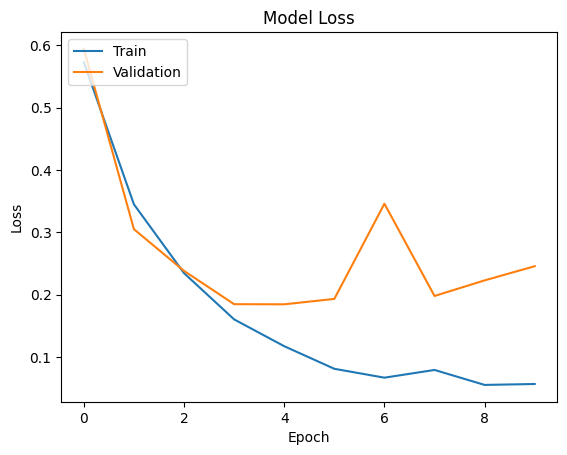

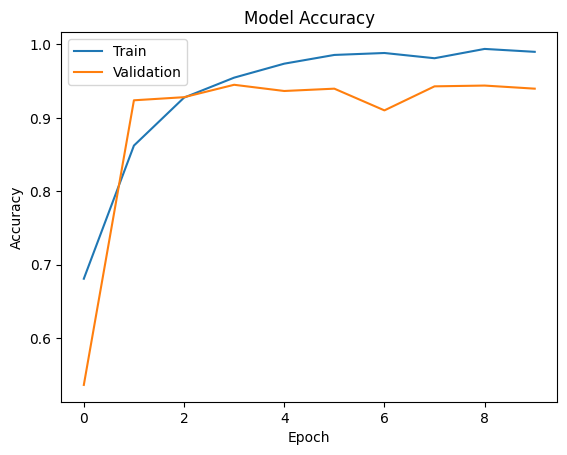

30/30 [==============================] - 7s 225ms/step - loss: 0.0702 - accuracy: 0.9831
Validation Loss: 0.07024363428354263
Validation Accuracy: 0.9830867052078247


In [ ]:

# Plot training and validation metrics
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Evaluate the model
val_loss, val_accuracy = model.evaluate(
    {'input_ids': input_ids_val, 'token_type_ids': token_type_ids_val, 'attention_mask': attention_mask_val},
    labels_val
)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")


In [ ]:
# Make predictions on the validation set
predictions = model.predict({
    'input_ids': input_ids_val,
    'token_type_ids': token_type_ids_val,
    'attention_mask': attention_mask_val
})

# Convert predictions from probabilities to binary class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()


30/30 [==============================] - 11s 214ms/step


In [ ]:
# Convert true labels to integers
true_labels = labels_val.numpy().astype(int).flatten()
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print classification report
print(classification_report(true_labels, predicted_labels))


              precision    recall  f1-score   support

           0       0.98      0.99      0.98       463
           1       0.99      0.98      0.98       483

    accuracy                           0.98       946
   macro avg       0.98      0.98      0.98       946
weighted avg       0.98      0.98      0.98       946



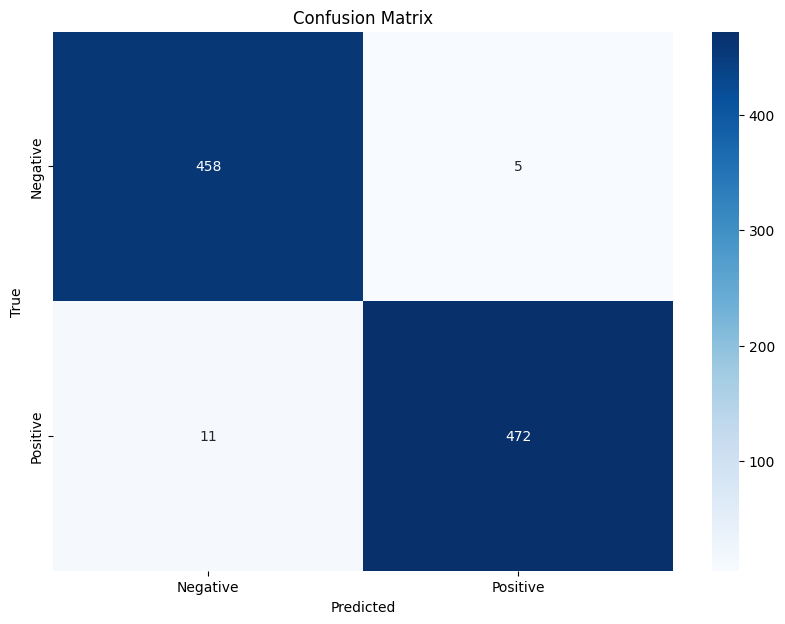

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define a function to plot confusion matrix
def plot_confusion_matrix(cm, labels):
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

# Plot the confusion matrix
plot_confusion_matrix(cm, labels=['Negative', 'Positive'])


#4. Comparing with other models


---



##4.1. compare models

In [ ]:
validation_data=pd.read_csv('/content/unseen.csv')


In [ ]:
# prompt: pick random 50 from validation_data

validation_data = validation_data.sample(n=50)


In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Define max sequence length
max_len = 100

# Tokenize the text data
def tokenize_function(text, max_len):
    return tokenizer(
        text,
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )

# Apply tokenization
tokenized_data_val = validation_data['text'].apply(lambda x: tokenize_function(x, max_len))

# Extract input_ids, token_type_ids, and attention_mask
input_ids_val = tf.concat([x['input_ids'] for x in tokenized_data_val], axis=0)
token_type_ids_val = tf.concat([x['token_type_ids'] for x in tokenized_data_val], axis=0)
attention_mask_val = tf.concat([x['attention_mask'] for x in tokenized_data_val], axis=0)
print(input_ids_val[0])
print(token_type_ids_val[0])
print(attention_mask_val[0])
# Convert labels to tensor
labels = tf.constant(validation_data['sentiment'].values, dtype=tf.float32)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tf.Tensor(
[  101  2025  2000 20252 12821  2026  2391  1010  2021  5807  1005  1056
  1045  2022  2583  2000  2404  1037 12191  4524  2682  2026  2835  1029
  2339  2003  2009  2623  2000  2681  2009  2005 11220  2015  1029 16215
  2595   102     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0], shape=(100,), dtype=int32)
tf.Tensor(
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0], shape=(100,), dtype=int32)
tf.Tensor(
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 0 0 0 0 0 0 0 0 0

In [ ]:
import numpy as np

# Convert TensorFlow tensors to numpy arrays
input_ids_np = input_ids_val.numpy()
token_type_ids_np = token_type_ids_val.numpy()
attention_mask_np = attention_mask_val.numpy()
labels_np = labels.numpy()

from sklearn.model_selection import train_test_split

# Split the data into training and validation sets
input_ids_train, input_ids_val, token_type_ids_train, token_type_ids_val, attention_mask_train, attention_mask_val, labels_train, labels_val = train_test_split(
    input_ids_np, token_type_ids_np, attention_mask_np, labels_np, test_size=0.44, random_state=42
)


In [ ]:
# Make predictions on the validation set
predictions = model.predict({
    'input_ids': input_ids_val,
    'token_type_ids': token_type_ids_val,
    'attention_mask': attention_mask_val
})

# Convert predictions from probabilities to binary class labels
predicted_labels = (predictions > 0.5).astype(int).flatten()


2/2 [==============================] - 5s 389ms/step


In [ ]:
# prompt: make a numpy.ndarray list of validation_data column 'sentiment' so i can compare with predicted_labels

actual_labels = validation_data['sentiment'].to_numpy()


In [ ]:
from tensorflow.keras.models import load_model
loaded_ACBiLSTM = load_model('/content/drive/MyDrive/model_for_thesis/ACBiLSTM-airline.h5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('ACBiLSTM model loaded')

ACBiLSTM model loaded


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


In [ ]:
from tensorflow.keras.models import load_model
loaded_IWV = load_model('/content/drive/MyDrive/model_for_thesis/iwv_model.h5')
print('IWV model loaded')

IWV model loaded


In [ ]:
from tensorflow.keras.models import load_model
loaded_ARC = load_model('/content/drive/MyDrive/model_for_thesis/arc_model.h5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('ARC model loaded')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


ARC model loaded


In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
# Step 1: Tokenization and Padding
texts = validation_data['text'].values
labels = validation_data['sentiment'].values
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)
x_data = pad_sequences(sequences, maxlen=max_len)

In [ ]:
yhat_arc=loaded_ARC.predict(x_data)

2/2 [==============================] - 1s 119ms/step


In [ ]:
yhat_iwv=loaded_IWV.predict(x_data)

2/2 [==============================] - 0s 95ms/step


In [ ]:
yhat_acbilstm = loaded_ACBiLSTM.predict(x_data)

2/2 [==============================] - 1s 57ms/step


In [ ]:
iwv_pred= (yhat_iwv > 0.5).astype(int).flatten()

In [ ]:
acbilstm_pred = (yhat_acbilstm > 0.5).astype(int).flatten()

In [ ]:
acbilstm_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0])

In [ ]:
arc_pred= (yhat_arc > 0.5).astype(int).flatten()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Example: Replace these with actual predictions and true labels
y_true = actual_labels  # True labels
y_pred_model1 = predicted_labels  # Predictions from model 1
y_pred_model2 = acbilstm_pred  # Predictions from model 2
y_pred_model3 = iwv_pred  # Predictions from model 3
y_pred_model4 = arc_pred  # Predictions from model 4


In [ ]:


# Compute metrics for each model
metrics = {
    'Our_model': {
        'accuracy': accuracy_score(y_true, y_pred_model1),
        'precision': precision_score(y_true, y_pred_model1, average='weighted'),
        'recall': recall_score(y_true, y_pred_model1, average='weighted'),
        'f1': f1_score(y_true, y_pred_model1, average='weighted')
    },
    'ACBiLSTM': {
        'accuracy': accuracy_score(y_true, y_pred_model2),
        'precision': precision_score(y_true, y_pred_model2, average='weighted'),
        'recall': recall_score(y_true, y_pred_model2, average='weighted'),
        'f1': f1_score(y_true, y_pred_model2, average='weighted')
    },
    'IWV': {
        'accuracy': accuracy_score(y_true, y_pred_model3),
        'precision': precision_score(y_true, y_pred_model3, average='weighted'),
        'recall': recall_score(y_true, y_pred_model3, average='weighted'),
        'f1': f1_score(y_true, y_pred_model3, average='weighted')
    },
    'ARC': {
        'accuracy': accuracy_score(y_true, y_pred_model4),
        'precision': precision_score(y_true, y_pred_model4, average='weighted'),
        'recall': recall_score(y_true, y_pred_model4, average='weighted'),
        'f1': f1_score(y_true, y_pred_model4, average='weighted')
    }
}


In [ ]:
import pandas as pd

# Convert metrics to DataFrame
metrics_df = pd.DataFrame(metrics).T  # Transpose for better readability
metrics_df


,accuracy,precision,recall,f1
Our_model,1.00,1.000000,1.00,1.000000
ACBiLSTM,0.50,0.517241,0.50,0.498599
IWV,0.40,0.400000,0.40,0.400000
ARC,0.34,0.347200,0.34,0.342385


In [ ]:
# prompt: save metrics_df as csv

# Save the DataFrame to a CSV file
metrics_df.to_csv('metrics.csv')


<ipython-input-44-1c57bca1bc28>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df['accuracy'], palette='viridis')


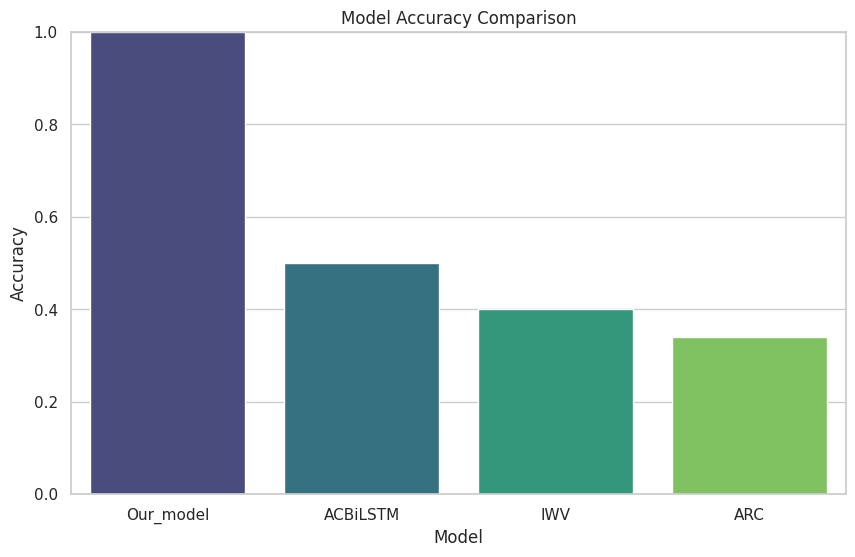

<ipython-input-44-1c57bca1bc28>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df['precision'], palette='viridis')


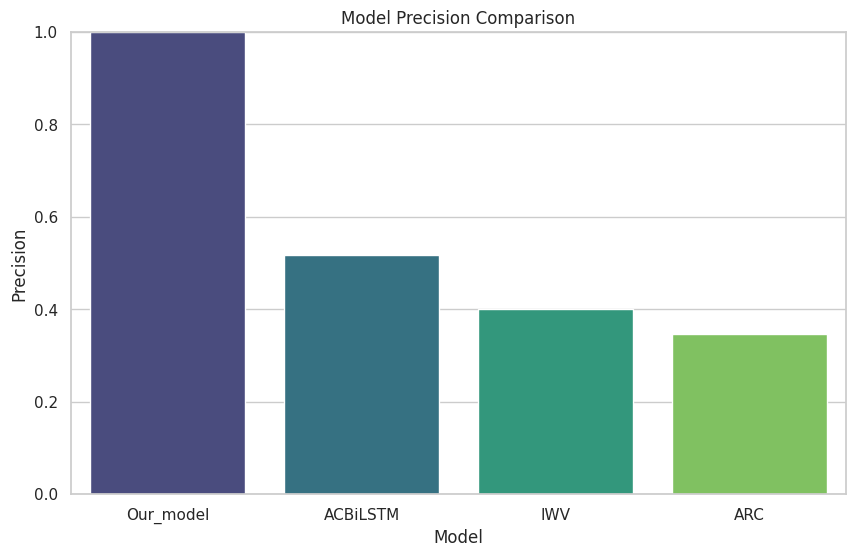

<ipython-input-44-1c57bca1bc28>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df['recall'], palette='viridis')


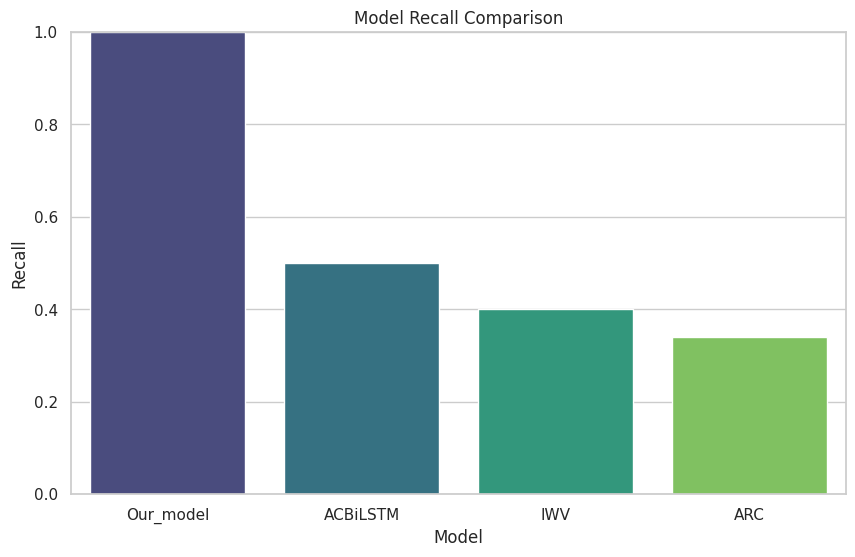

<ipython-input-44-1c57bca1bc28>:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics_df.index, y=metrics_df['f1'], palette='viridis')


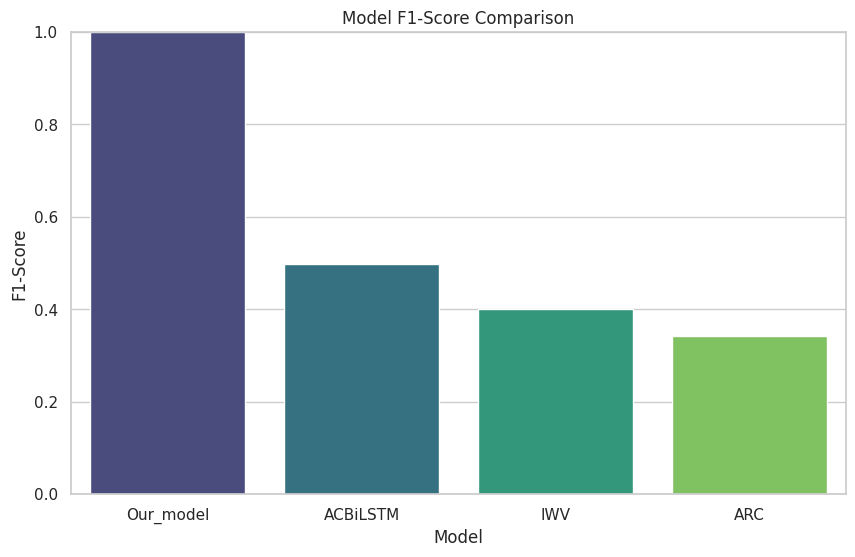

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Plot Accuracy
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y=metrics_df['accuracy'], palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()

# Plot Precision
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y=metrics_df['precision'], palette='viridis')
plt.title('Model Precision Comparison')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0, 1)
plt.show()

# Plot Recall
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y=metrics_df['recall'], palette='viridis')
plt.title('Model Recall Comparison')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0, 1)
plt.show()

# Plot F1-Score
plt.figure(figsize=(10, 6))
sns.barplot(x=metrics_df.index, y=metrics_df['f1'], palette='viridis')
plt.title('Model F1-Score Comparison')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0, 1)
plt.show()


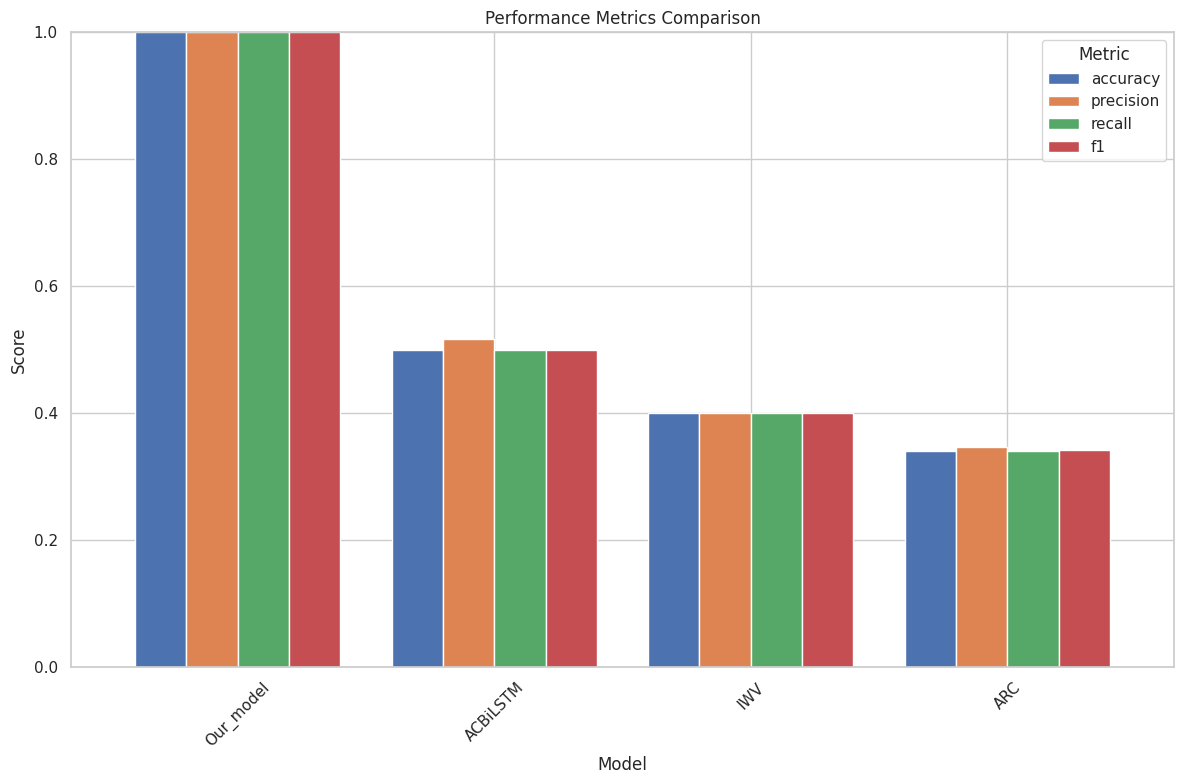

In [ ]:
import matplotlib.pyplot as plt

# Plot grouped bar chart
metrics_df.plot(kind='bar', figsize=(12, 8), width=0.8)
plt.title('Performance Metrics Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


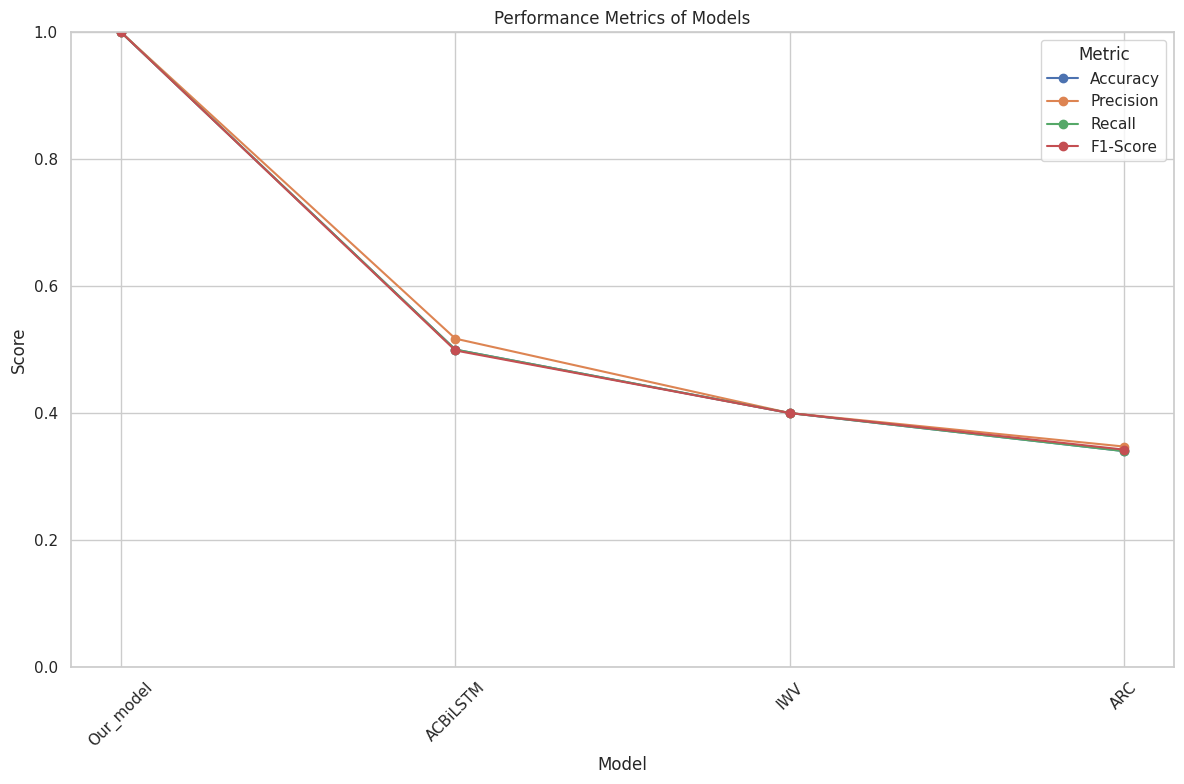

In [ ]:
import matplotlib.pyplot as plt

# Define your data
data = {
    'Model': ['Our_model', 'ACBiLSTM', 'IWV', 'ARC'],
    'Accuracy': [1.00, 0.50, 0.40, 0.34],
    'Precision': [1.000000, 0.517241, 0.40, 0.347200],
    'Recall': [1.00, 0.50, 0.40, 0.34],
    'F1-Score': [1.000000, 0.498599, 0.40, 0.342385]
}

# Convert to DataFrame
import pandas as pd
metrics_df = pd.DataFrame(data)
metrics_df.set_index('Model', inplace=True)

# Plotting
plt.figure(figsize=(12, 8))

# Plot each metric
for metric in metrics_df.columns:
    plt.plot(metrics_df.index, metrics_df[metric], marker='o', label=metric)

plt.title('Performance Metrics of Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.legend(title='Metric')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


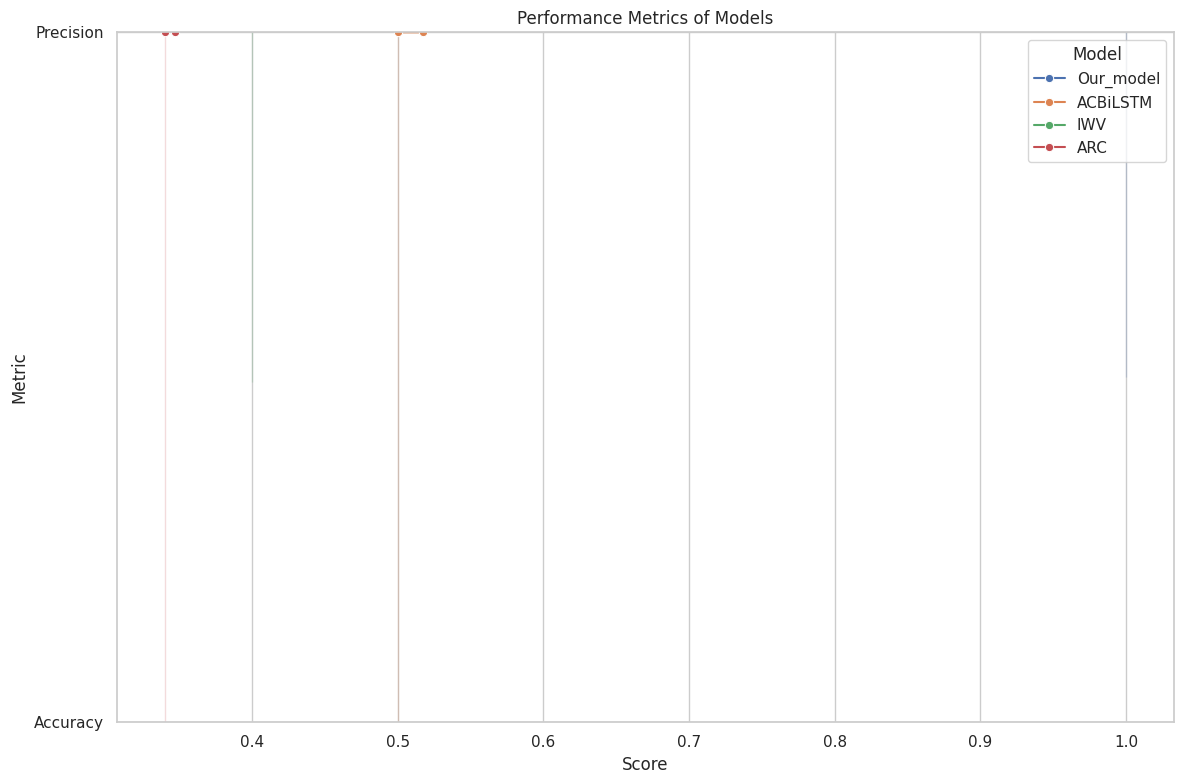

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
metrics_long = metrics_df.T.reset_index().melt(id_vars='index', var_name='Model', value_name='Score')
metrics_long.rename(columns={'index': 'Metric'}, inplace=True)

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=metrics_long, x='Score', y='Metric', hue='Model', marker='o')
plt.title('Performance Metrics of Models')
plt.xlabel('Score')
plt.ylabel('Metric')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the metrics data
data = {
    'Model': ['Our_model', 'ACBiLSTM', 'IWV', 'ARC'],
    'Accuracy': [1.00, 0.50, 0.40, 0.34],
    'Precision': [1.000000, 0.517241, 0.40, 0.347200],
    'Recall': [1.00, 0.50, 0.40, 0.34],
    'F1-Score': [1.000000, 0.498599, 0.40, 0.342385]
}

# Create DataFrame
metrics_df = pd.DataFrame(data)
metrics_df.set_index('Model', inplace=True)

# Reformat DataFrame for plotting
metrics_df = metrics_df.T


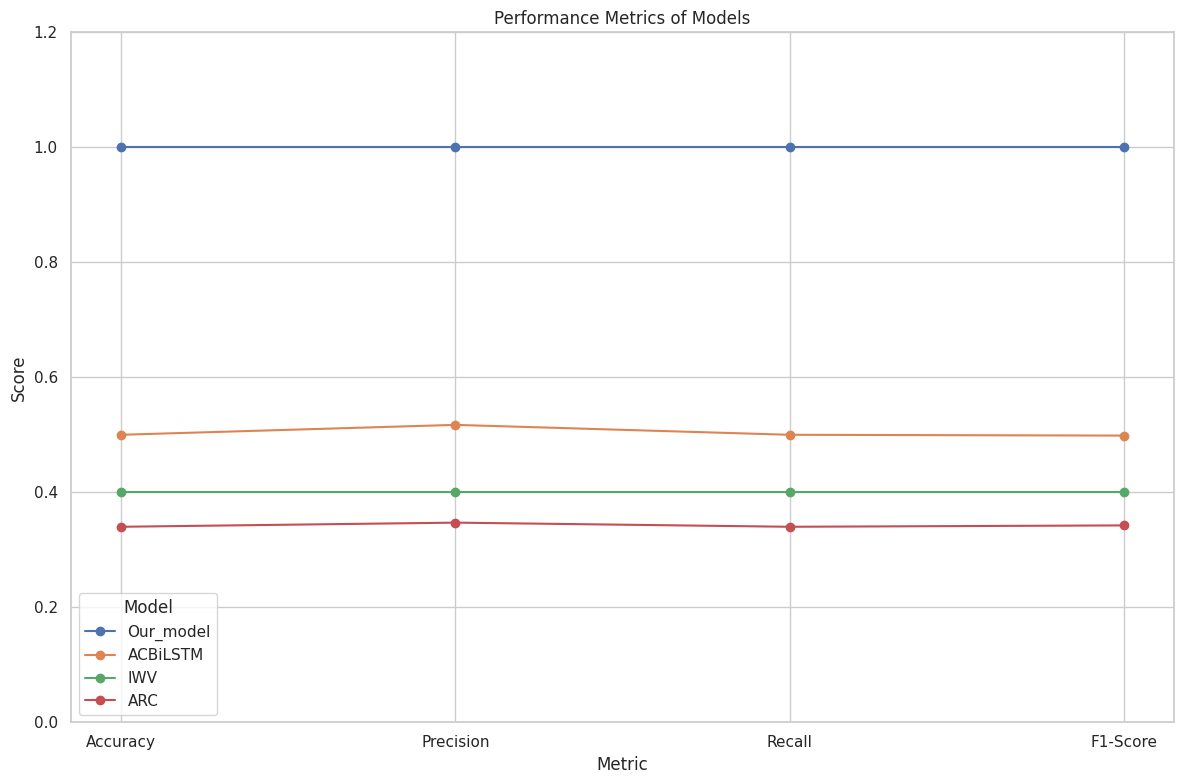

In [ ]:
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(12, 8))

# Plot each model with a different color
for model in metrics_df.columns:
    plt.plot(metrics_df.index, metrics_df[model], marker='o', label=model)

# Add titles and labels
plt.title('Performance Metrics of Models')
plt.xlabel('Metric')
plt.ylabel('Score')
plt.ylim(0, 1.2)  # Assuming scores are between 0 and 1
plt.legend(title='Model')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Melt the DataFrame to long format
metrics_long = metrics_df.reset_index().melt(id_vars='Model', var_name='Metric', value_name='Score')

# Plotting
plt.figure(figsize=(12, 8))
sns.lineplot(data=metrics_long, x='Model', y='Score', hue='Metric', marker='o')
plt.title('Performance Metrics of Models')
plt.xlabel('Model')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


KeyError: 'Model'

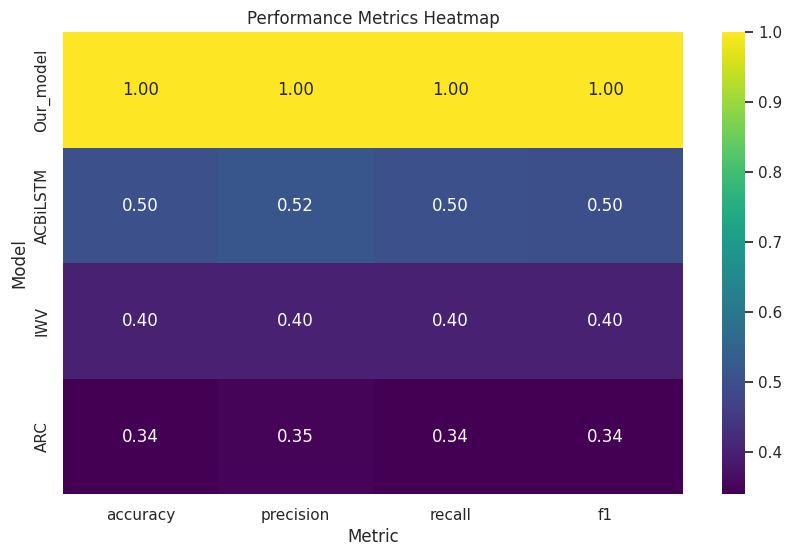

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(metrics_df, annot=True, cmap='viridis', fmt='.2f', cbar=True)
plt.title('Performance Metrics Heatmap')
plt.xlabel('Metric')
plt.ylabel('Model')
plt.show()


In [ ]:
max_len = 100
dataset_name = 'CD'

loaded_our_model = model
print('Our model loaded')
#loaded_SSBED_model = load_model(path +  'SS-BED.hdf5')
print('SS-BED model loaded')
#loaded_ARC_model = load_model(path + 'ARC.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext , "tf": tf})
print('ARC model loaded')
#loaded_HAN_model = load_model(path  + 'HAN.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext})
print('HAN model loaded')
#loaded_CRNN_model = load_model(path  + 'CRNN.hdf5')
print('CRNN model loaded')
#loaded_IWV_model = load_model(path  + 'IWV.hdf5')
print('IWV model loaded')
#loaded_ACBiLSTM_model = load_model(path  + 'AC_BiLSTM.hdf5', custom_objects={'AttentionWithContext': AttentionWithContext})
print('AC-BiLSTM model loaded')

sequences_test = tokenizer.texts_to_sequences(x_test)
x_test_seq = pad_sequences(sequences_test, maxlen=max_len)

yhat_our = loaded_our_model.predict(x_test_seq)
print('our model complete!')

#yhat_ssbed = loaded_SSBED_model.predict(x_test_seq)
print('SS-BED model complete!')

#yhat_arc = loaded_ARC_model.predict(x_test_seq)
print('ARC model complete!')

################################################################################
x_test_seq_exp = np.expand_dims(x_test_seq, axis=1)
y_test_exp = np.expand_dims(y_test, axis=1)

#yhat_han = loaded_HAN_model.predict(x_test_seq_exp)
print('HAN model complete!')
################################################################################
#yhat_crnn = loaded_CRNN_model.predict(x_test_seq)
print('CRNN model complete!')

#yhat_iwv = loaded_IWV_model.predict(x_test_seq)
print('IWV model complete!')

#yhat_acbilstm = loaded_ACBiLSTM_model.predict(x_test_seq)
print('ACBiLSTM model complete!')

fpr_our, tpr_our, threshold = roc_curve(y_test, yhat_our)
roc_auc_our = auc(fpr_our, tpr_our)

fpr_ssbed, tpr_ssbed, threshold = roc_curve(y_test, yhat_ssbed)
roc_auc_ssbed = auc(fpr_ssbed, tpr_ssbed)

fpr_arc, tpr_arc, threshold = roc_curve(y_test, yhat_arc)
roc_auc_arc = auc(fpr_arc, tpr_arc)

fpr_han, tpr_han, threshold = roc_curve(y_test_exp, yhat_han)
roc_auc_han = auc(fpr_han, tpr_han)

fpr_crn, tpr_crn, threshold = roc_curve(y_test, yhat_crnn)
roc_auc_crn = auc(fpr_crn, tpr_crn)

fpr_iwv, tpr_iwv, threshold = roc_curve(y_test, yhat_iwv)
roc_auc_iwv = auc(fpr_iwv, tpr_iwv)

fpr_acbilstm, tpr_acbilstm, threshold = roc_curve(y_test, yhat_acbilstm)
roc_auc_acbilstm = auc(fpr_acbilstm, tpr_acbilstm)

#############################3333
fpr_stacked, tpr_stacked, threshold = roc_curve(y_test, yhat[:,1])
roc_auc_stacked = auc(fpr_stacked, tpr_stacked)
#################################3

fig, ax = plt.subplots(figsize=(8,7)) # create a new figure with a default 111 subplot
#plt.gcf().set_facecolor('white')
ax.plot(fpr_our, tpr_our, label='Our Model (area = %0.3f)' % roc_auc_our, linewidth=2, color = 'red')
ax.plot(fpr_ssbed, tpr_ssbed, label='SS-BED (area = %0.3f)' % roc_auc_ssbed, linewidth=2)
ax.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f)' % roc_auc_arc, linewidth=2)
ax.plot(fpr_han, tpr_han, label='HAN (area = %0.3f)' % roc_auc_han, linewidth=2)
ax.plot(fpr_crn, tpr_crn, label='CRNN (area = %0.3f)' % roc_auc_crn, linewidth=2)
ax.plot(fpr_iwv, tpr_iwv, label='IWV (area = %0.3f)' % roc_auc_iwv, linewidth=2)
ax.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM (area = %0.3f)' % roc_auc_acbilstm, linewidth=2)

ax.plot(fpr_stacked, tpr_stacked, label='Stacked (area = %0.3f)' % roc_auc_stacked, linewidth=2)

#ax.plot([0, 1], [0, 1], 'k--', linewidth=2)
#ax.set_facecolor('white')
ax.set_xlabel('False Positive Rate', fontsize=18)
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic')
ax.legend(loc='lower left',  ncol = 2,bbox_to_anchor=(0.05, 0.0, 0.0, 0.0),framealpha= 0.2)


axins = zoomed_inset_axes(ax, 1.5, loc = 'center right') # zoom-factor: 2.5, location: upper-left

axins.plot(fpr_our, tpr_our, label='Our Model (area = %0.3f)' % roc_auc_our, linewidth=2, color = 'red')
axins.plot(fpr_ssbed, tpr_ssbed, label='SS-BED (area = %0.3f)' % roc_auc_ssbed, linewidth=2)
axins.plot(fpr_arc, tpr_arc, label='ARC (area = %0.3f)' % roc_auc_arc, linewidth=2)
axins.plot(fpr_han, tpr_han, label='HAN (area = %0.3f)' % roc_auc_han, linewidth=2)
axins.plot(fpr_crn, tpr_crn, label='CRNN (area = %0.3f)' % roc_auc_crn, linewidth=2)
axins.plot(fpr_iwv, tpr_iwv, label='IWV (area = %0.3f)' % roc_auc_iwv, linewidth=2)
axins.plot(fpr_acbilstm, tpr_acbilstm, label='AC-BiLSTM (area = %0.3f)' % roc_auc_acbilstm, linewidth=2)


axins.plot(fpr_stacked, tpr_stacked, label='Stacked (area = %0.3f)' % roc_auc_stacked, linewidth=2)
#axins.legend(loc='best', bbox_to_anchor=(0.95, 0.0, 0.43, 0.3), fancybox=True, framealpha=0.5)

axins.patch.set_facecolor('white')
axins.patch.set_alpha(0.3)

axins.spines['bottom'].set_color('0.7')
axins.spines['bottom'].set_linewidth('1')
axins.spines['bottom'].set_linestyle('--')
axins.spines['top'].set_color('0.7')
axins.spines['top'].set_linewidth('1')
axins.spines['top'].set_linestyle('--')
axins.spines['right'].set_color('0.7')
axins.spines['right'].set_linewidth('1')
axins.spines['right'].set_linestyle('--')
axins.spines['left'].set_color('0.7')
axins.spines['left'].set_linewidth('1')
axins.spines['left'].set_linestyle('--')

x1, x2, y1, y2 = 0, 0.3, 0.7, 1 # specify the limits
#x1, x2, y1, y2 = 0.2, 0.5, 0.6, 0.9 # specify the limits

axins.set_xlim(x1, x2) # apply the x-limits
axins.set_ylim(y1, y2) # apply the y-limits

plt.yticks(visible=False)
plt.xticks(visible=False)
plt.grid(visible=False)

from mpl_toolkits.axes_grid1.inset_locator import mark_inset
mark_inset(ax, axins, loc1=1, loc2=3, fc="white", ec="0.3", alpha = 0.3, ls = '-.')

plt.savefig(path+ dataset_name + '-AUC.png',dpi=300,bbox_inches = 'tight',pad_inches = 0.1)

In [ ]:



# Parameters
embedding_dim = 100  # Example embedding dimensions (depends on your embeddings)
max_len = 100  # Maximum length of sequences (adjust based on your data)

# Load your dataset
df = pd.read_csv('/content/pos-neg-shuffled_cleaned_airline_data (1).csv')  # Dataset with 'text' and 'sentiment' columns
texts = df['text'].values
labels = df['sentiment'].values


In [ ]:

# Step 1: Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)
x_data = pad_sequences(sequences, maxlen=max_len)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_data, labels, test_size=0.2, random_state=42)


In [ ]:

# Step 2: Loading pre-trained embedding (for example GloVe)
embedding_index = {}
with open('glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Prepare embedding matrix
emb_mat = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        emb_mat[i] = embedding_vector


## 4.2. Other models

###4.2.1.ACBiLSTM

In [ ]:

# Step 3: Model Definition
def build_ACBiLSTM(emb_mat):
    tweet_input = Input(shape=(max_len,), dtype='int32', name='AC-BiLSTM_inp')
    tweet_encoder = Embedding(emb_mat.shape[0], embedding_dim, weights=[emb_mat], input_length=max_len, trainable=False, name='AC-BiLSTM_enc')(tweet_input)
    x = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', name='AC-BiLSTM_conv')(tweet_encoder)
    x = Bidirectional(LSTM(64, return_sequences=True, name='AC-BiLSTM_BiLSTM'))(x)
    x = Dropout(0.7, name='AC-BiLSTM_drop')(x)
    x = AttentionWithContext()(x)  # Assuming AttentionWithContext is correctly defined
    x = Dense(1, name='AC-BiLSTM_out')(x)
    output = Activation('sigmoid')(x)

    model = Model(inputs=[tweet_input], outputs=[output])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model


In [ ]:
# import bert
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:

# Step 4: Build and Train the Model
model = build_ACBiLSTM(emb_mat)

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
check_point = tf.keras.callbacks.ModelCheckpoint('ACBiLSTM-airline.h5', save_best_only=True, monitor='val_loss')
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32, callbacks=[check_point, early_stopping])

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


Epoch 1/10
119/119 [==============================] - 22s 151ms/step - loss: 0.5077 - accuracy: 0.7354 - val_loss: 0.3722 - val_accuracy: 0.8330
Epoch 2/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


119/119 [==============================] - 19s 160ms/step - loss: 0.3451 - accuracy: 0.8471 - val_loss: 0.3392 - val_accuracy: 0.8594
Epoch 3/10
119/119 [==============================] - 18s 148ms/step - loss: 0.2893 - accuracy: 0.8788 - val_loss: 0.3533 - val_accuracy: 0.8499
Epoch 4/10
119/119 [==============================] - 17s 142ms/step - loss: 0.2517 - accuracy: 0.8931 - val_loss: 0.2954 - val_accuracy: 0.8721
Epoch 5/10
119/119 [==============================] - 17s 143ms/step - loss: 0.2197 - accuracy: 0.9132 - val_loss: 0.3210 - val_accuracy: 0.8668
Epoch 6/10
119/119 [==============================] - 17s 146ms/step - loss: 0.1785 - accuracy: 0.9315 - val_loss: 0.3189 - val_accuracy: 0.8668
Epoch 7/10
30/30 [==============================] - 1s 33ms/step - loss: 0.2954 - accuracy: 0.8721
Validation Accuracy: 87.21%


###4.2.2.IWV

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, Conv1D, GlobalMaxPooling1D, Dense, Activation
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:


# Parameters
embedding_dim = 100  # The dimension of your GloVe embeddings
max_len = 100  # Maximum length of input sequences (adjust based on your data)


In [ ]:

# Load your dataset
df = pd.read_csv('/content/pos-neg-shuffled_cleaned_airline_data (1).csv')  # Dataset with 'text' and 'sentiment' columns
texts = df['text'].values
labels = df['sentiment'].values


In [ ]:

# Step 1: Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)
x_data = pad_sequences(sequences, maxlen=max_len)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_data, labels, test_size=0.2, random_state=42)


In [ ]:

# Step 2: Loading pre-trained GloVe embeddings (100-dimensional)
embedding_index = {}
with open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Prepare the embedding matrix
emb_mat = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        emb_mat[i] = embedding_vector


In [ ]:

# Step 3: Define the IWV Model
def build_IWV(emb_mat):
    tweet_input = Input(shape=(max_len,), dtype='int32', name='IWV_inp')
    tweet_encoder = Embedding(emb_mat.shape[0], embedding_dim, weights=[emb_mat], input_length=max_len, trainable=False, name='IWV_enc')(tweet_input)

    x = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu', name='IWV_conv_1')(tweet_encoder)
    x = Conv1D(filters=100, kernel_size=5, padding='valid', activation='relu', name='IWV_conv_2')(x)
    x = Conv1D(filters=100, kernel_size=7, padding='valid', activation='relu', name='IWV_conv_3')(x)
    x = GlobalMaxPooling1D(name='IWV_pool')(x)

    x = Dense(64, activation="relu", name='IWV_dense')(x)
    x = Dense(1, name='IWV_out')(x)
    output = Activation('sigmoid')(x)

    model = Model(inputs=[tweet_input], outputs=[output])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    return model


In [ ]:
import os

# Step 4: Build and Train the Model
model = build_IWV(emb_mat)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Directory to save the model
model_save_path = '/content/drive/MyDrive/model_for_thesis/iwv_model.h5'
os.makedirs(os.path.dirname(model_save_path), exist_ok=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Step 6: Save the trained model
model.save(model_save_path)
print(f'Model saved to {model_save_path}')


Epoch 1/20
119/119 [==============================] - 31s 252ms/step - loss: 0.4975 - accuracy: 0.7503 - val_loss: 0.4191 - val_accuracy: 0.8161
Epoch 2/20
119/119 [==============================] - 9s 80ms/step - loss: 0.3400 - accuracy: 0.8503 - val_loss: 0.3329 - val_accuracy: 0.8372
Epoch 3/20
119/119 [==============================] - 8s 63ms/step - loss: 0.2645 - accuracy: 0.8862 - val_loss: 0.3193 - val_accuracy: 0.8636
Epoch 4/20
119/119 [==============================] - 10s 80ms/step - loss: 0.1981 - accuracy: 0.9225 - val_loss: 0.3873 - val_accuracy: 0.8467
Epoch 5/20
119/119 [==============================] - 9s 77ms/step - loss: 0.1264 - accuracy: 0.9537 - val_loss: 0.3880 - val_accuracy: 0.8510
Epoch 6/20
30/30 [==============================] - 1s 18ms/step - loss: 0.3193 - accuracy: 0.8636
Validation Accuracy: 86.36%


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved to /content/drive/MyDrive/model_for_thesis/iwv_model.h5


In [ ]:

# Step 4: Build and Train the Model
model = build_IWV(emb_mat)

# Early stopping callback to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32, callbacks=[early_stopping])

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


In [ ]:
def build_IWV(emb_mat):
  tweet_input = Input(shape=(x_train_seq.shape[1],), dtype='int32', name = 'IWV_inp')
  tweet_encoder = Embedding(emb_mat.shape[0], embedding_dim, weights=[emb_mat], input_length=max_len, trainable=False,name = 'IWV_enc')(tweet_input)
  x = Conv1D(filters=100, kernel_size=3, padding='valid', activation='relu',name = 'IWV_conv_1')(tweet_encoder)
  x = Conv1D(filters=100, kernel_size=5, padding='valid', activation='relu',name = 'IWV_conv_2')(x)
  x = Conv1D(filters=100, kernel_size=7, padding='valid', activation='relu',name = 'IWV_conv_3')(x)
  x = GlobalMaxPooling1D(name='IWV_pool')(x)
  x = Dense(64, activation="relu",name='IWV_dense')(x)
  x = Dense(1,name = 'IWV_out')(x)
  output = Activation('sigmoid')(x)
  model = Model(inputs=[tweet_input], outputs=[output])
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

In [ ]:

# Step 4: Build and Train the Model
model = build_IWV(emb_mat)

# Early stopping callback to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
check_point = tf.keras.callbacks.ModelCheckpoint('IWV-airline.h5', save_best_only=True, monitor='val_loss')
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=10, batch_size=32, callbacks=[check_point, early_stopping])

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')


NameError: name 'x_train_seq' is not defined

###4.2.3. ARC

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, SpatialDropout1D, Bidirectional, GRU, Conv1D, GlobalMaxPooling1D, Dense, Lambda
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Attention


In [ ]:

# Load GloVe Embeddings and Dataset Preprocessing
embedding_dim = 100  # GloVe embedding dimension (100d)
max_len = 100  # Maximum length of input sequences

# Load dataset
df = pd.read_csv('/content/pos-neg-shuffled_cleaned_airline_data (1).csv')  # Replace with your actual dataset file
texts = df['text'].values
labels = df['sentiment'].values


In [ ]:

# Step 1: Tokenization and Padding
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1

# Convert texts to sequences
sequences = tokenizer.texts_to_sequences(texts)
x_data = pad_sequences(sequences, maxlen=max_len)

# Split data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_data, labels, test_size=0.2, random_state=42)


In [ ]:

# Step 2: Load GloVe embeddings
embedding_index = {}
with open('/content/drive/MyDrive/glove.6B.100d.txt', encoding='utf8') as f:  # Make sure GloVe file is in the correct directory
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

# Prepare the embedding matrix
emb_mat = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        emb_mat[i] = embedding_vector


In [ ]:
import tensorflow as tf
from transformers import TFBertModel
from tensorflow.keras.layers import Input, Dropout, Dense, Conv1D, GlobalAveragePooling1D, GlobalMaxPooling1D, SpatialDropout1D, Bidirectional, LSTM, GRU, concatenate, Lambda, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

def dot_product(x, kernel):
    if tf.keras.backend.backend() == 'tensorflow':
        return tf.squeeze(tf.matmul(x, tf.expand_dims(kernel, axis=-1)), axis=-1)
    else:
        return tf.matmul(x, kernel)

In [ ]:
class AttentionWithContext(tf.keras.layers.Layer):
    def __init__(self, W_regularizer=None, u_regularizer=None, b_regularizer=None,
                 W_constraint=None, u_constraint=None, b_constraint=None, bias=True, **kwargs):
        self.init = tf.keras.initializers.get('glorot_uniform')
        self.W_regularizer = tf.keras.regularizers.get(W_regularizer)
        self.u_regularizer = tf.keras.regularizers.get(u_regularizer)
        self.b_regularizer = tf.keras.regularizers.get(b_regularizer)
        self.W_constraint = tf.keras.constraints.get(W_constraint)
        self.u_constraint = tf.keras.constraints.get(u_constraint)
        self.b_constraint = tf.keras.constraints.get(b_constraint)
        self.bias = bias
        super(AttentionWithContext, self).__init__(**kwargs)

    def build(self, input_shape):
        self.W = self.add_weight(shape=(input_shape[-1], input_shape[-1]),
                                 initializer=self.init,
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint,
                                 name='{}_W'.format(self.name))
        if self.bias:
            self.b = self.add_weight(shape=(input_shape[-1],),
                                     initializer='zero',
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint,
                                     name='{}_b'.format(self.name))
        self.u = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 regularizer=self.u_regularizer,
                                 constraint=self.u_constraint,
                                 name='{}_u'.format(self.name))
        super(AttentionWithContext, self).build(input_shape)

    def call(self, x, mask=None):
        uit = tf.keras.backend.dot(x, self.W)
        if self.bias:
            uit += self.b
        uit = tf.keras.activations.tanh(uit)
        ait = tf.keras.backend.dot(uit, tf.expand_dims(self.u, axis=-1))
        ait = tf.squeeze(ait, axis=-1)
        a = tf.keras.backend.exp(ait)
        if mask is not None:
            a *= tf.keras.backend.cast(mask, tf.float32)
        a /= tf.keras.backend.cast(tf.keras.backend.sum(a, axis=1, keepdims=True) + tf.keras.backend.epsilon(), tf.float32)
        a = tf.expand_dims(a, axis=-1)
        weighted_input = x * a
        return tf.keras.backend.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0], input_shape[-1]


In [ ]:


def build_ARC(emb_mat):
    tweet_input = Input(shape=(max_len,), dtype='int32', name='ARC_inp')
    tweet_encoder = Embedding(emb_mat.shape[0], embedding_dim, weights=[emb_mat], input_length=max_len, trainable=False, name='ARC_enc')(tweet_input)

    x1 = SpatialDropout1D(0.5)(tweet_encoder)

    # Use GRU instead of CuDNNGRU (GPU optimization)
    x_gru = Bidirectional(GRU(64, return_sequences=True, name='ARC_BiGRU'))(x1)

    # Attention mechanism
    x = AttentionWithContext()(x_gru)  # Ensure AttentionWithContext is implemented or imported correctly

    # Expand dimensions to match Conv1D input
    x = Lambda(lambda t: tf.expand_dims(t, 2))(x)

    # CNN layers
    x2 = Conv1D(100, kernel_size=3, padding='valid', kernel_initializer='he_uniform', name='ARC_CNN_1')(x)
    x2 = Conv1D(100, kernel_size=5, padding='valid', kernel_initializer='he_uniform', name='ARC_CNN_2')(x2)
    x2 = Conv1D(100, kernel_size=7, padding='valid', kernel_initializer='he_uniform', name='ARC_CNN_3')(x2)

    # Global Max Pooling
    max_pool1 = GlobalMaxPooling1D(name='ARC_pool')(x2)

    # Fully connected layer
    x5 = Dense(64, activation="relu", name='ARC_dense')(max_pool1)

    # Output layer
    output = Dense(1, activation='sigmoid')(x5)

    model = Model(inputs=tweet_input, outputs=output)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:


# Step 4: Build and Train the Model
model = build_ARC(emb_mat)

# Early stopping to avoid overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=32, callbacks=[early_stopping])

# Step 5: Evaluate the model
loss, accuracy = model.evaluate(x_val, y_val)
print(f'Validation Accuracy: {accuracy * 100:.2f}%')

# Step 6: Save the trained model
model_save_path = '/content/drive/MyDrive/model_for_thesis/arc_model.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')


Epoch 1/20
119/119 [==============================] - 31s 181ms/step - loss: 0.6009 - accuracy: 0.6743 - val_loss: 0.4856 - val_accuracy: 0.7896
Epoch 2/20
119/119 [==============================] - 23s 196ms/step - loss: 0.5047 - accuracy: 0.7574 - val_loss: 0.4269 - val_accuracy: 0.7907
Epoch 3/20
119/119 [==============================] - 21s 180ms/step - loss: 0.4560 - accuracy: 0.7899 - val_loss: 0.3765 - val_accuracy: 0.8340
Epoch 4/20
119/119 [==============================] - 26s 223ms/step - loss: 0.4299 - accuracy: 0.8069 - val_loss: 0.4647 - val_accuracy: 0.8256
Epoch 5/20
119/119 [==============================] - 21s 173ms/step - loss: 0.4133 - accuracy: 0.8087 - val_loss: 0.3467 - val_accuracy: 0.8446
Epoch 6/20
119/119 [==============================] - 23s 193ms/step - loss: 0.3861 - accuracy: 0.8209 - val_loss: 0.3936 - val_accuracy: 0.8319
Epoch 7/20
119/119 [==============================] - 21s 178ms/step - loss: 0.3987 - accuracy: 0.8180 - val_loss: 0.3371 - val_ac

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Citation:

"Basiri, M. E., Nemati, S., Abdar, M., Cambria, E., & Acharya, U. R. (2021). ABCDM: An attention-based bidirectional CNN-RNN deep model for sentiment analysis. Future Generation Computer Systems, 115, 279-294.".
https://github.com/moloud1987/ABCDM